In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [35]:
df = pd.read_csv('income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
df.shape

(32561, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [39]:
df.columns = df.columns.str.strip()

In [40]:
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [41]:
df['income'].value_counts(normalize=True)*100

income
 <=50K    75.919044
 >50K     24.080956
Name: proportion, dtype: float64

In [42]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [44]:
df = df.replace(' ?', np.nan)
df = df.dropna()

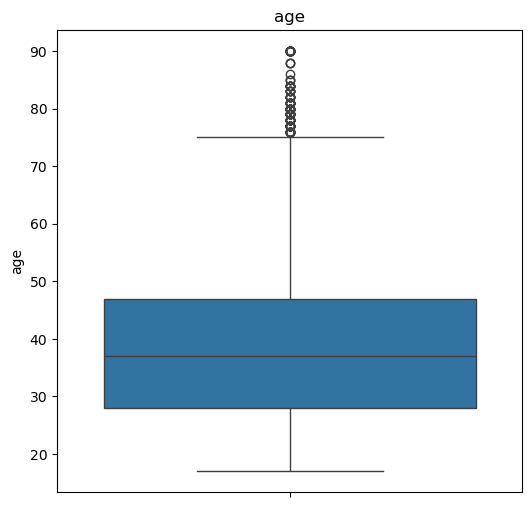

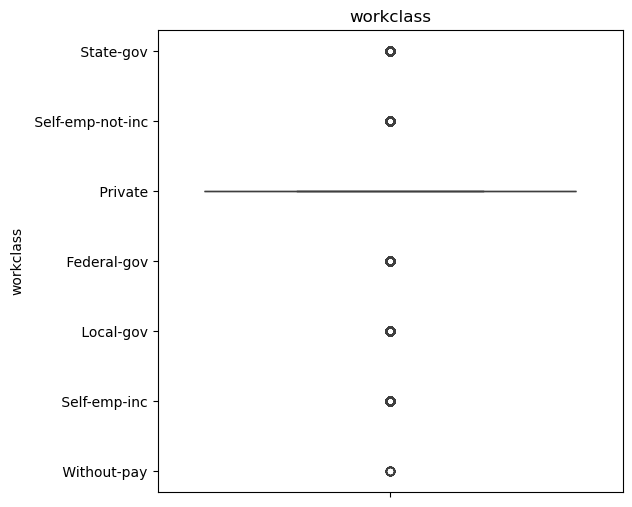

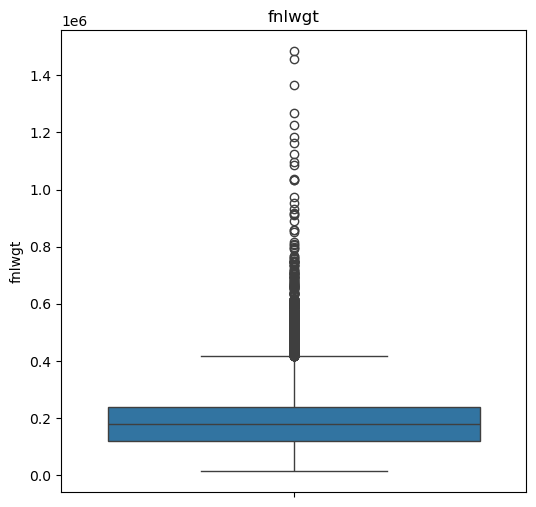

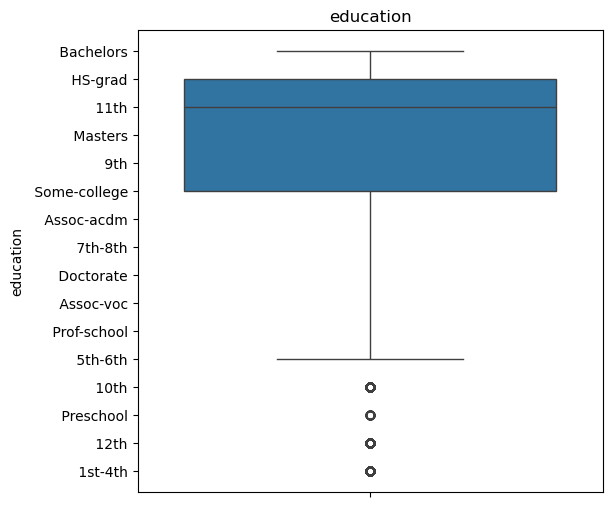

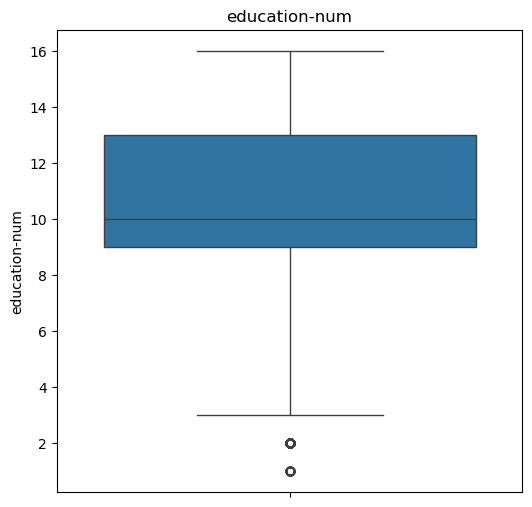

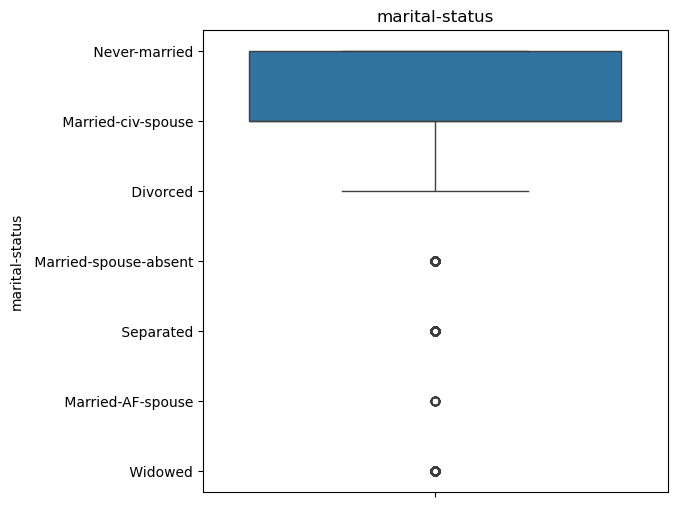

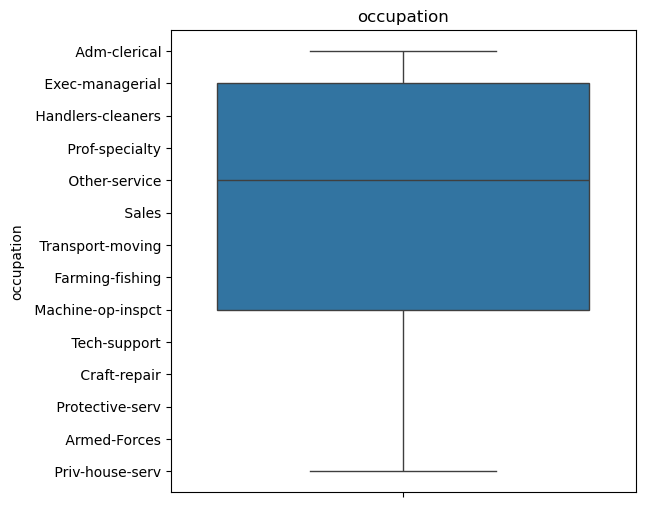

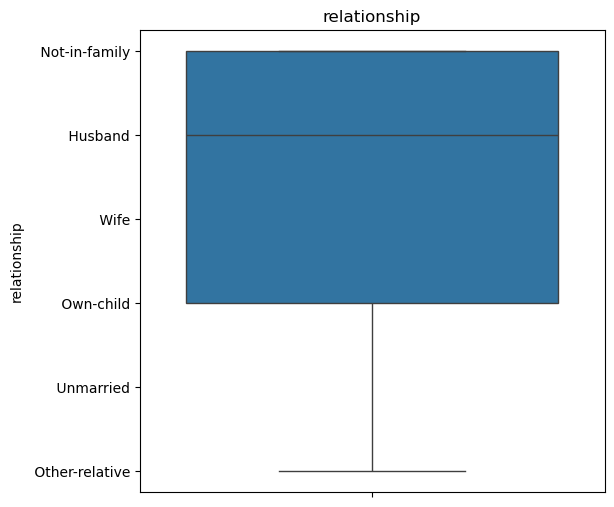

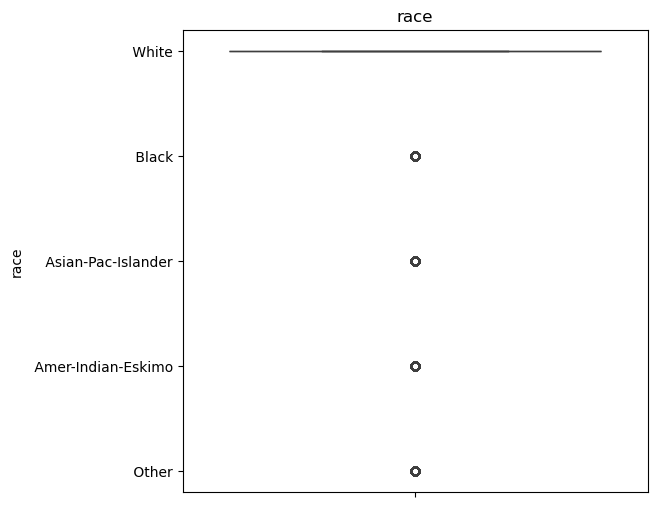

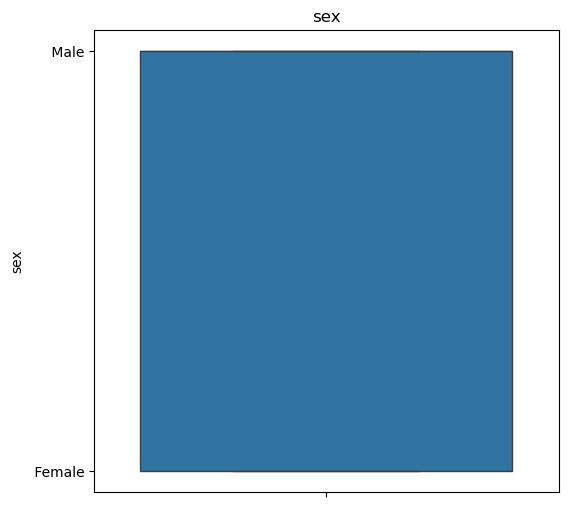

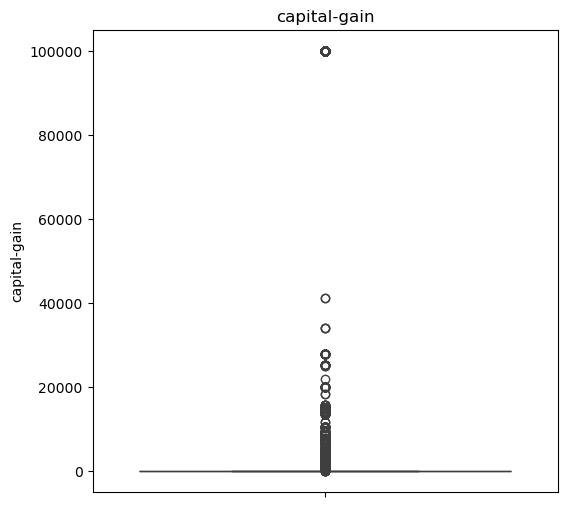

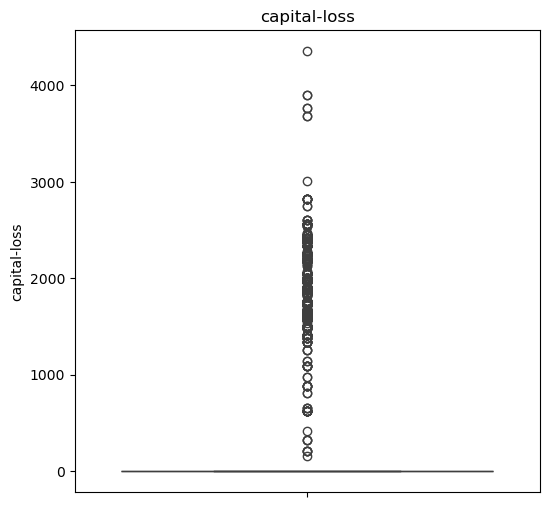

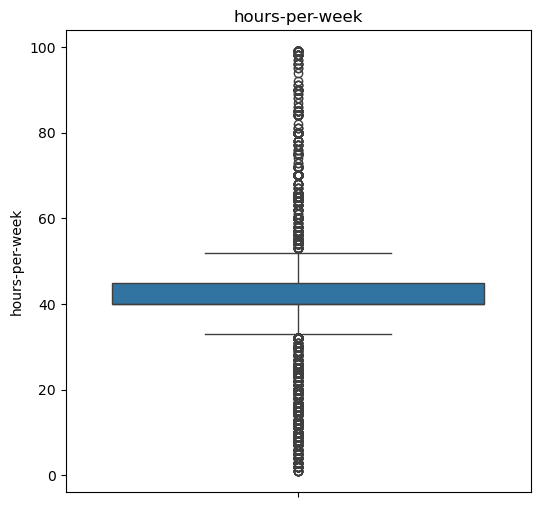

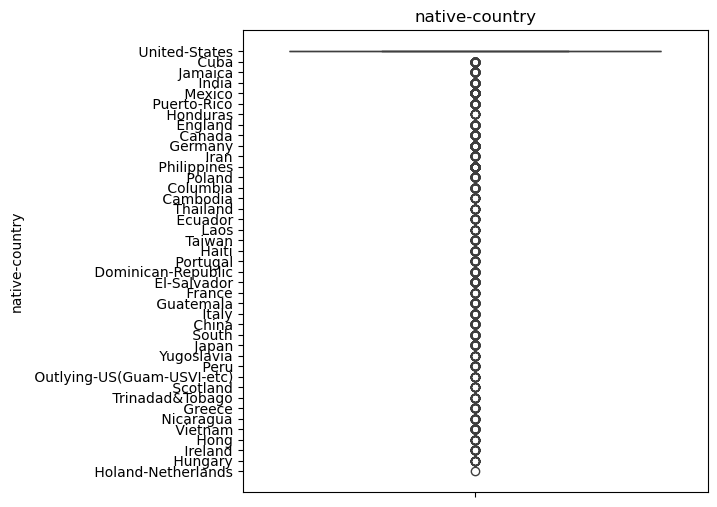

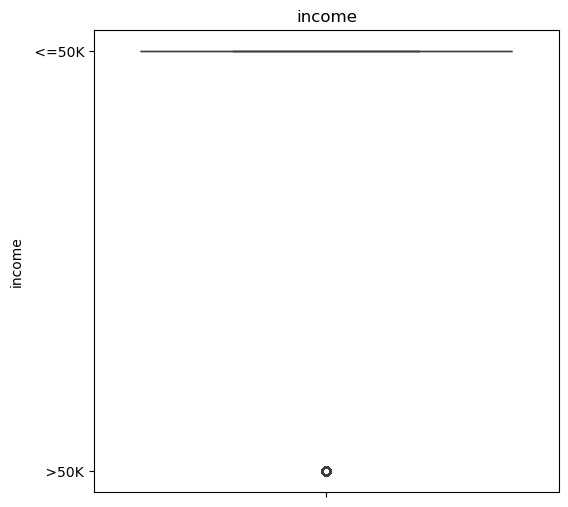

In [45]:
for col in df.columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df[col])
    plt.title(col)
plt.show()

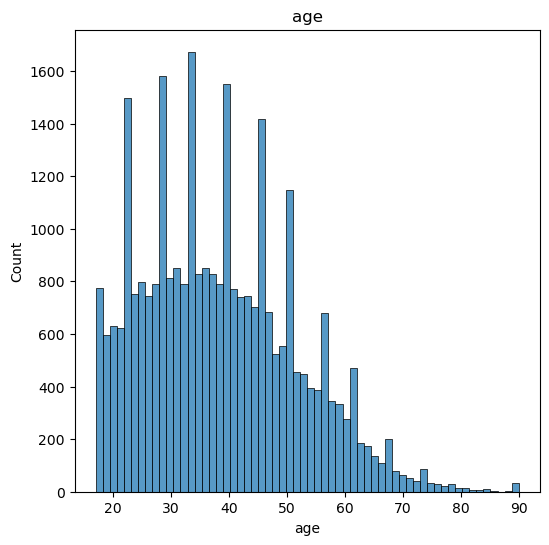

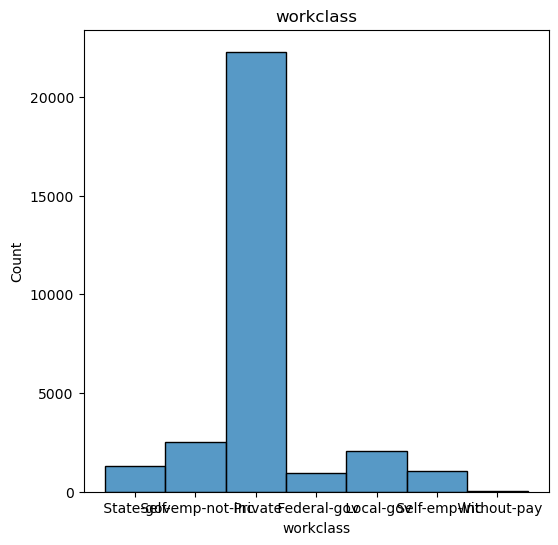

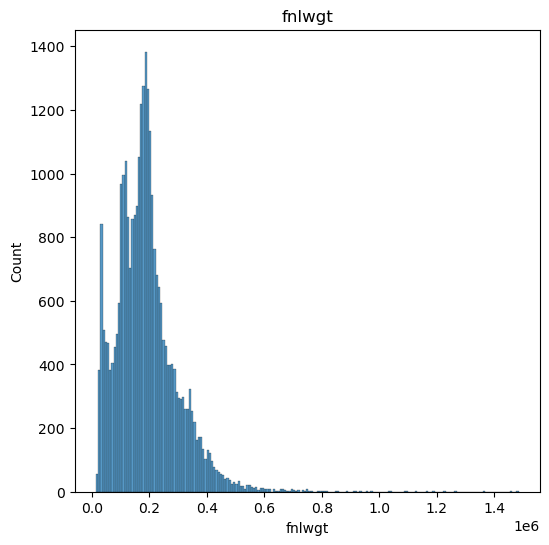

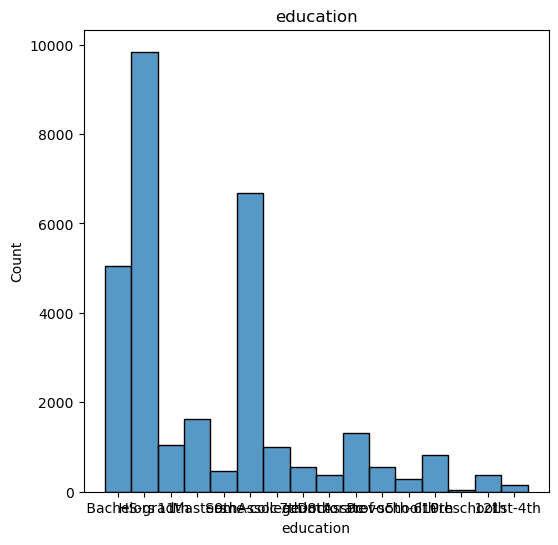

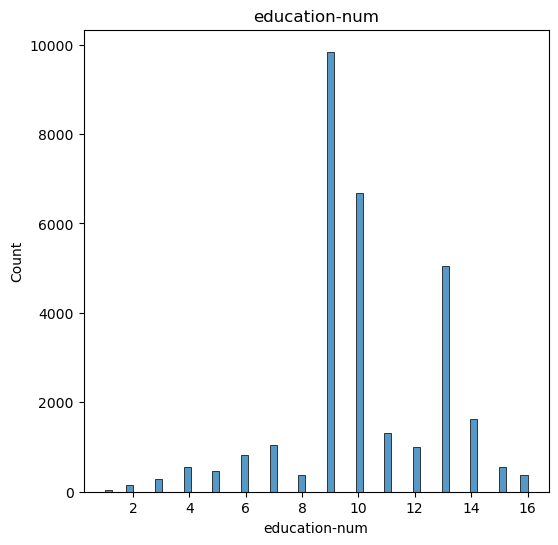

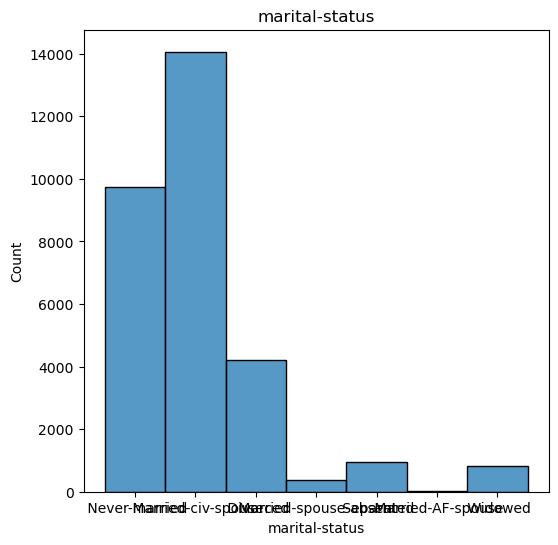

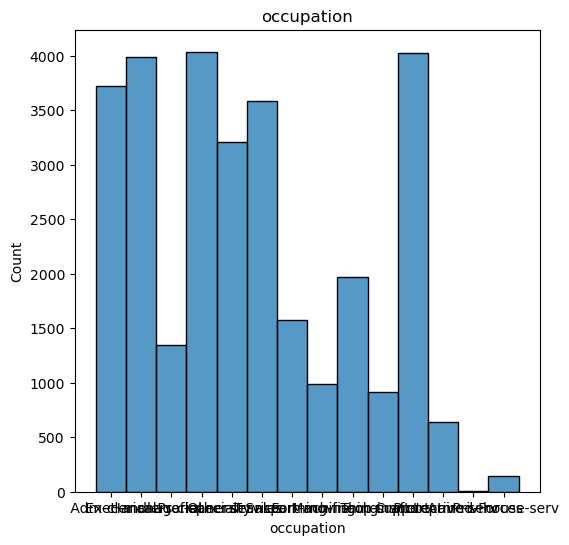

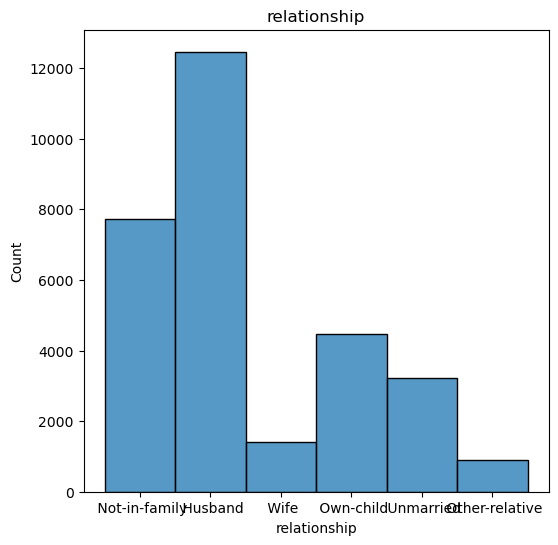

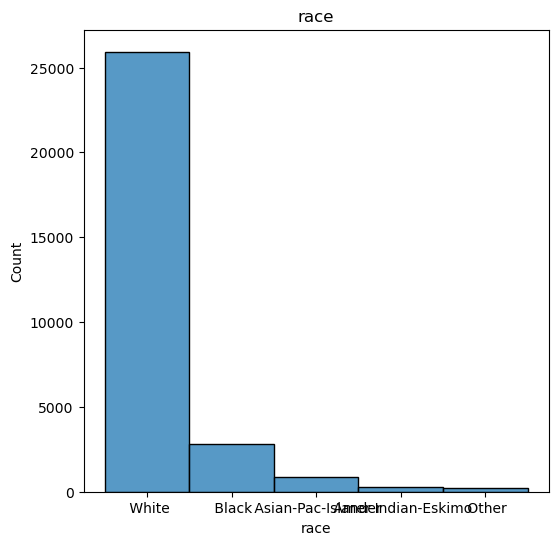

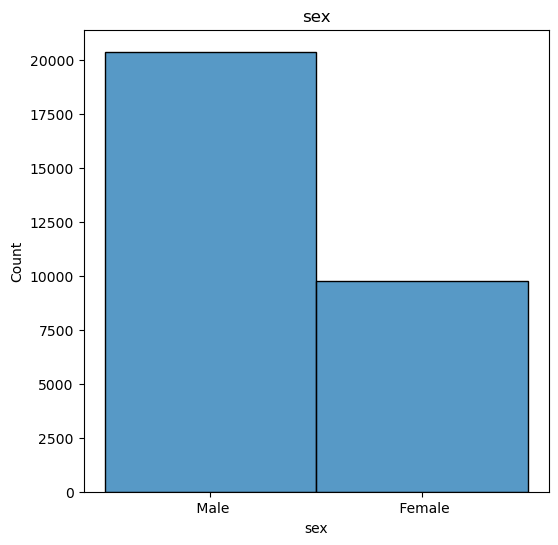

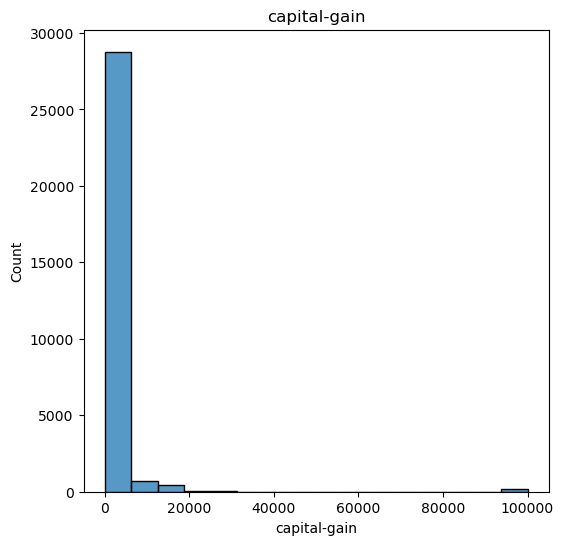

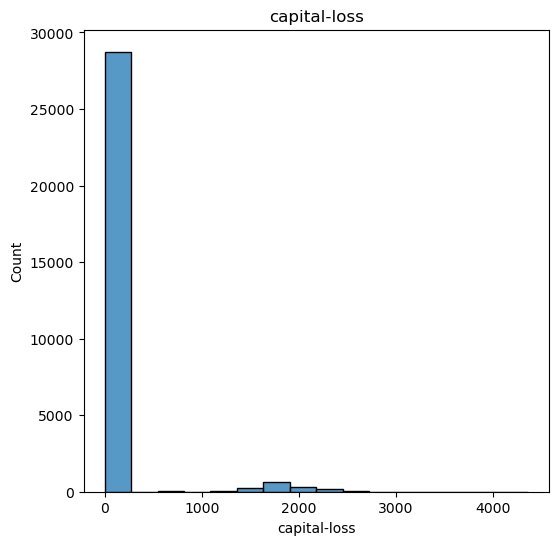

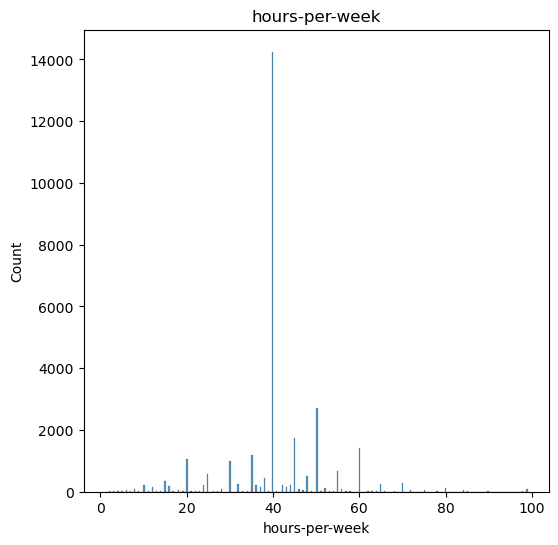

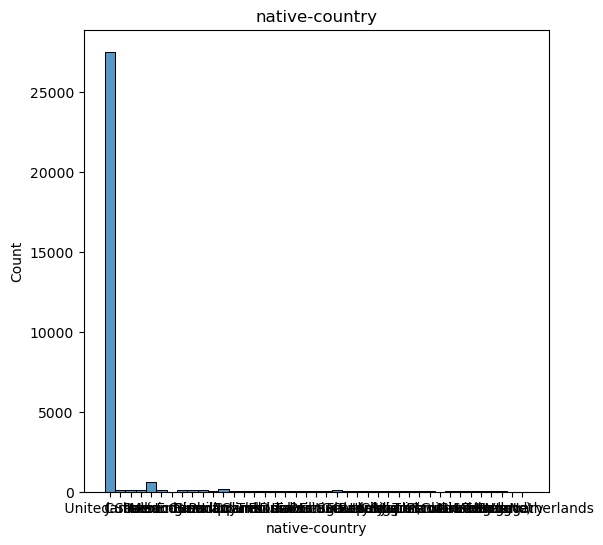

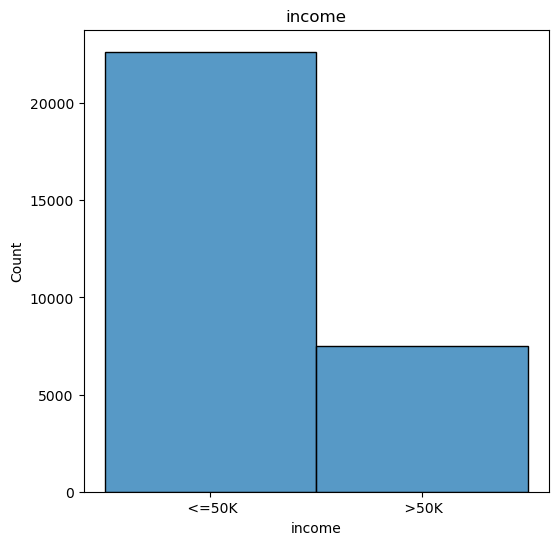

In [46]:
for col in df.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df[col])
    plt.title(col)
plt.show()

In [49]:
def label(df):
    le=LabelEncoder()
    for column in df.columns:
        df[column]=le.fit_transform(df[column])
    return df

In [52]:
df = label(df)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,15471,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,2,7555,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,2,7377,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,2,12060,11,8,4,0,3,4,1,0,0,19,38,0


In [53]:
x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [55]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [56]:
def running_svm(model,c):
    cl=svm.SVC(kernel=model,C=c)
    return cl

In [57]:
svm_default_1=running_svm("rbf",1.0)
svm_default_2=running_svm("rbf",10.0)
svm_default_3=running_svm("rbf",100.0)

In [58]:
svm_linear_1=running_svm("linear",1.0)
svm_linear_2=running_svm("linear",10.0)
svm_linear_3=running_svm("linear",100.0)

In [59]:
svm_poly_1=running_svm("poly",1.0)
svm_poly_2=running_svm("poly",10.0)
svm_poly_3=running_svm("poly",100.0)

In [60]:
svm_sigmoid_1=running_svm("poly",1.0)
svm_sigmoid_2=running_svm("poly",10.0)
svm_sigmoid_3=running_svm("poly",100.0)

In [61]:
models = {
    'svm_rbf_C1': svm_default_1,
    'svm_rbf_C10': svm_default_2,
    'svm_rbf_C100': svm_default_3,
    'svm_linear_C1': svm_linear_1,
    'svm_linear_C10': svm_linear_2,
    'svm_linear_C100': svm_linear_3,
    'svm_poly_C1': svm_poly_1,
    'svm_poly_C10': svm_poly_2,
    'svm_poly_C100': svm_poly_3,
    'svm_sigmoid_C1': svm_sigmoid_1,
    'svm_sigmoid_C10': svm_sigmoid_2,
    'svm_sigmoid_C100': svm_sigmoid_3
}

In [62]:
def fit_test_svm(models,x_test,x_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        y_train_pred=mod.predict(x_train)
        print("Model name",model)
        print("Test set metrics")
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Precision:",precision_score(y_test, y_pred))
        print("Recall:",recall_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Train set metrics")
        print("Accuracy:",accuracy_score(y_train,y_train_pred))
        print("Precision:",precision_score(y_train,y_train_pred))
        print("Recall:",recall_score(y_train,y_train_pred))
        print("Classification report is")
        print(classification_report(y_train,y_train_pred))
        print("confusion matrix is")
        cm=confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot=True)
        plt.show()

Model name svm_rbf_C1
Test set metrics
Accuracy: 0.8506547323056523
Precision: 0.7909343200740055
Recall: 0.5588235294117647
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4503
           1       0.79      0.56      0.65      1530

    accuracy                           0.85      6033
   macro avg       0.83      0.75      0.78      6033
weighted avg       0.85      0.85      0.84      6033

Train set metrics
Accuracy: 0.85299846657549
Precision: 0.7828717710030254
Recall: 0.5627300100368016
Classification report is
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18151
           1       0.78      0.56      0.65      5978

    accuracy                           0.85     24129
   macro avg       0.83      0.76      0.78     24129
weighted avg       0.85      0.85      0.84     24129

confusion matrix is


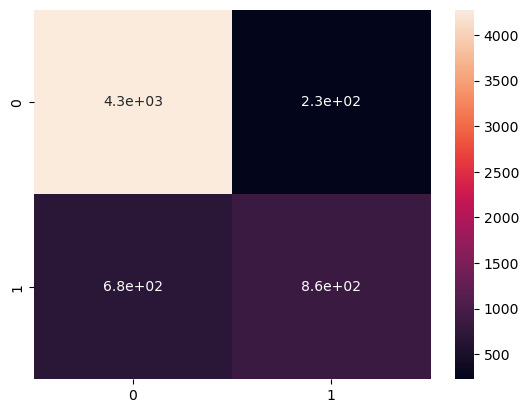

Model name svm_rbf_C10
Test set metrics
Accuracy: 0.8496602022211172
Precision: 0.7664670658682635
Recall: 0.5856209150326798
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4503
           1       0.77      0.59      0.66      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033

Train set metrics
Accuracy: 0.8719383314683575
Precision: 0.8081519419547588
Recall: 0.6334894613583139
Classification report is
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     18151
           1       0.81      0.63      0.71      5978

    accuracy                           0.87     24129
   macro avg       0.85      0.79      0.81     24129
weighted avg       0.87      0.87      0.87     24129

confusion matrix is


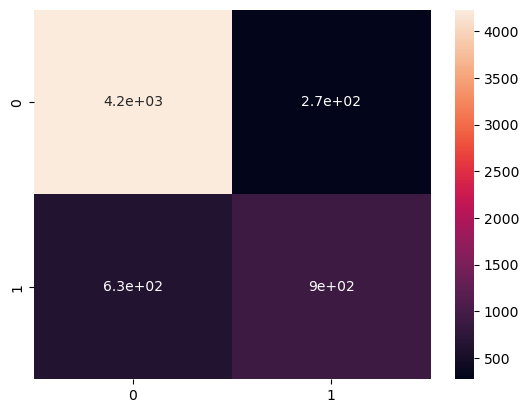

Model name svm_rbf_C100
Test set metrics
Accuracy: 0.8417039615448367
Precision: 0.7272727272727273
Recall: 0.6013071895424836
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4503
           1       0.73      0.60      0.66      1530

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033

Train set metrics
Accuracy: 0.8942351527207925
Precision: 0.8409633757961783
Recall: 0.7067581130812981
Classification report is
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     18151
           1       0.84      0.71      0.77      5978

    accuracy                           0.89     24129
   macro avg       0.87      0.83      0.85     24129
weighted avg       0.89      0.89      0.89     24129

confusion matrix is


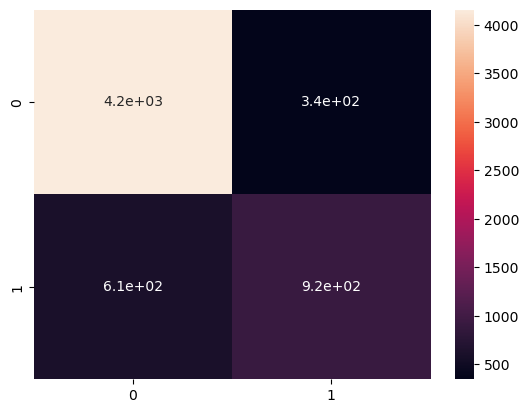

Model name svm_linear_C1
Test set metrics
Accuracy: 0.8035803083043263
Precision: 0.7832512315270936
Recall: 0.31176470588235294
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4503
           1       0.78      0.31      0.45      1530

    accuracy                           0.80      6033
   macro avg       0.79      0.64      0.66      6033
weighted avg       0.80      0.80      0.77      6033

Train set metrics
Accuracy: 0.8049649798997057
Precision: 0.7741379310344828
Recall: 0.3004349280695885
Classification report is
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     18151
           1       0.77      0.30      0.43      5978

    accuracy                           0.80     24129
   macro avg       0.79      0.64      0.66     24129
weighted avg       0.80      0.80      0.77     24129

confusion matrix is


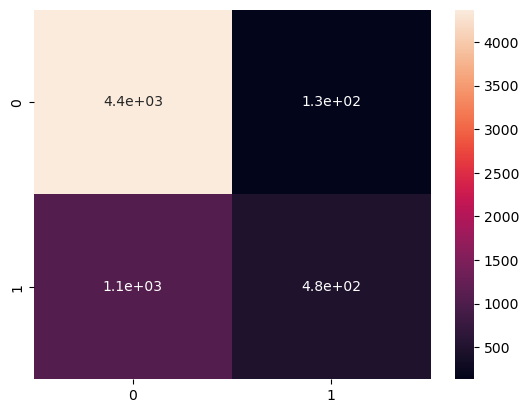

Model name svm_linear_C10
Test set metrics
Accuracy: 0.8035803083043263
Precision: 0.7832512315270936
Recall: 0.31176470588235294
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4503
           1       0.78      0.31      0.45      1530

    accuracy                           0.80      6033
   macro avg       0.79      0.64      0.66      6033
weighted avg       0.80      0.80      0.77      6033

Train set metrics
Accuracy: 0.8049235359940321
Precision: 0.7740405347132384
Recall: 0.3002676480428237
Classification report is
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     18151
           1       0.77      0.30      0.43      5978

    accuracy                           0.80     24129
   macro avg       0.79      0.64      0.66     24129
weighted avg       0.80      0.80      0.77     24129

confusion matrix is


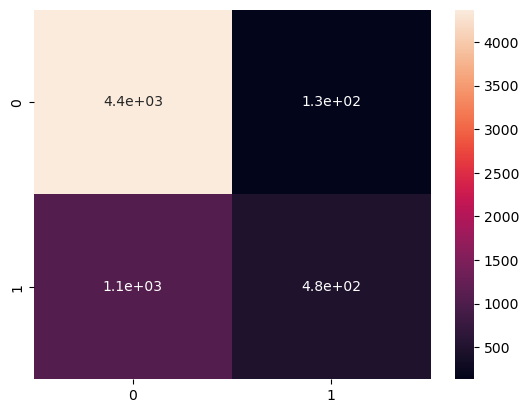

Model name svm_linear_C100
Test set metrics
Accuracy: 0.8035803083043263
Precision: 0.7832512315270936
Recall: 0.31176470588235294
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4503
           1       0.78      0.31      0.45      1530

    accuracy                           0.80      6033
   macro avg       0.79      0.64      0.66      6033
weighted avg       0.80      0.80      0.77      6033

Train set metrics
Accuracy: 0.8050893116167268
Precision: 0.7741935483870968
Recall: 0.3011040481766477
Classification report is
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     18151
           1       0.77      0.30      0.43      5978

    accuracy                           0.81     24129
   macro avg       0.79      0.64      0.66     24129
weighted avg       0.80      0.81      0.77     24129

confusion matrix is


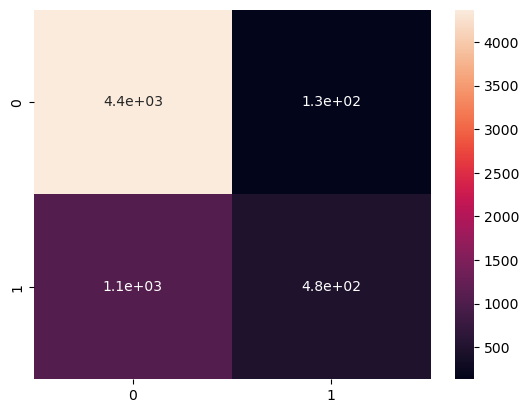

Model name svm_poly_C1
Test set metrics
Accuracy: 0.8423669816011934
Precision: 0.7921291624621595
Recall: 0.5130718954248366
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4503
           1       0.79      0.51      0.62      1530

    accuracy                           0.84      6033
   macro avg       0.82      0.73      0.76      6033
weighted avg       0.84      0.84      0.83      6033

Train set metrics
Accuracy: 0.8476522027435865
Precision: 0.7889056224899599
Recall: 0.5257611241217799
Classification report is
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     18151
           1       0.79      0.53      0.63      5978

    accuracy                           0.85     24129
   macro avg       0.82      0.74      0.77     24129
weighted avg       0.84      0.85      0.84     24129

confusion matrix is


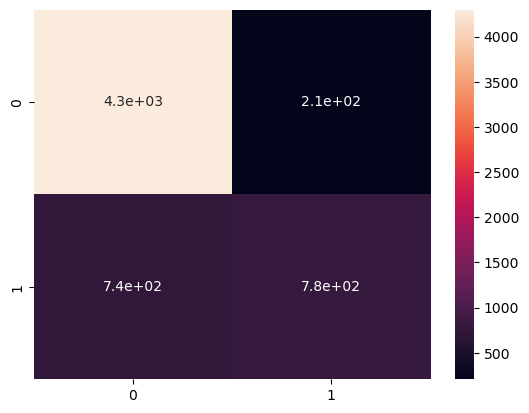

Model name svm_poly_C10
Test set metrics
Accuracy: 0.8451848168407095
Precision: 0.7738970588235294
Recall: 0.550326797385621
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4503
           1       0.77      0.55      0.64      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.75      0.77      6033
weighted avg       0.84      0.85      0.84      6033

Train set metrics
Accuracy: 0.8488126321024493
Precision: 0.7696759259259259
Recall: 0.5562060889929742
Classification report is
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     18151
           1       0.77      0.56      0.65      5978

    accuracy                           0.85     24129
   macro avg       0.82      0.75      0.77     24129
weighted avg       0.84      0.85      0.84     24129

confusion matrix is


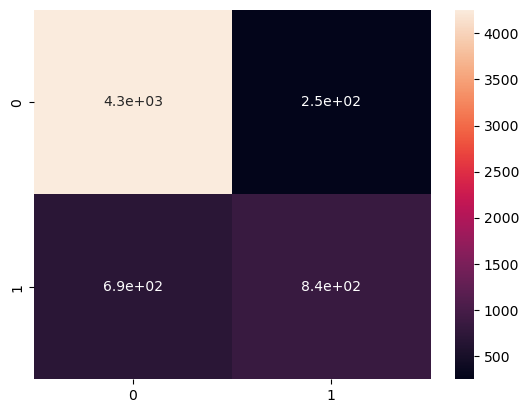

Model name svm_poly_C100
Test set metrics
Accuracy: 0.8468423669816012
Precision: 0.7739602169981917
Recall: 0.5594771241830065
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4503
           1       0.77      0.56      0.65      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.75      0.78      6033
weighted avg       0.84      0.85      0.84      6033

Train set metrics
Accuracy: 0.8500559492726595
Precision: 0.7700228832951945
Recall: 0.5628972900635664
Classification report is
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18151
           1       0.77      0.56      0.65      5978

    accuracy                           0.85     24129
   macro avg       0.82      0.75      0.78     24129
weighted avg       0.84      0.85      0.84     24129

confusion matrix is


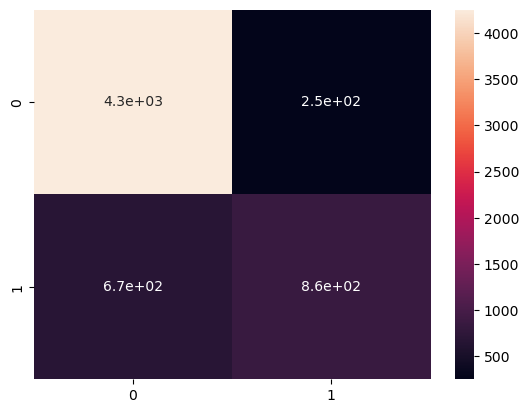

Model name svm_sigmoid_C1
Test set metrics
Accuracy: 0.8423669816011934
Precision: 0.7921291624621595
Recall: 0.5130718954248366
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4503
           1       0.79      0.51      0.62      1530

    accuracy                           0.84      6033
   macro avg       0.82      0.73      0.76      6033
weighted avg       0.84      0.84      0.83      6033

Train set metrics
Accuracy: 0.8476522027435865
Precision: 0.7889056224899599
Recall: 0.5257611241217799
Classification report is
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     18151
           1       0.79      0.53      0.63      5978

    accuracy                           0.85     24129
   macro avg       0.82      0.74      0.77     24129
weighted avg       0.84      0.85      0.84     24129

confusion matrix is


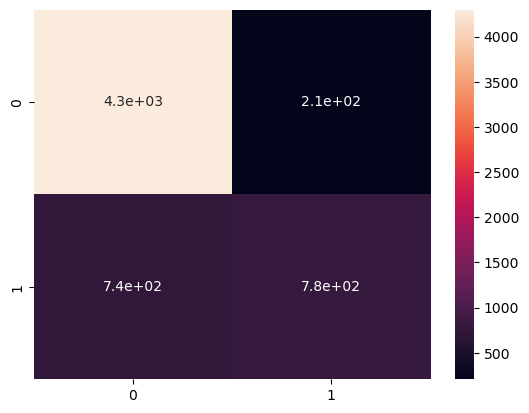

Model name svm_sigmoid_C10
Test set metrics
Accuracy: 0.8451848168407095
Precision: 0.7738970588235294
Recall: 0.550326797385621
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4503
           1       0.77      0.55      0.64      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.75      0.77      6033
weighted avg       0.84      0.85      0.84      6033

Train set metrics
Accuracy: 0.8488126321024493
Precision: 0.7696759259259259
Recall: 0.5562060889929742
Classification report is
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     18151
           1       0.77      0.56      0.65      5978

    accuracy                           0.85     24129
   macro avg       0.82      0.75      0.77     24129
weighted avg       0.84      0.85      0.84     24129

confusion matrix is


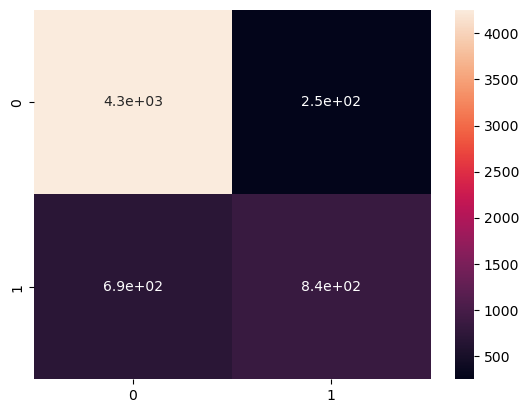

Model name svm_sigmoid_C100
Test set metrics
Accuracy: 0.8468423669816012
Precision: 0.7739602169981917
Recall: 0.5594771241830065
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4503
           1       0.77      0.56      0.65      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.75      0.78      6033
weighted avg       0.84      0.85      0.84      6033

Train set metrics
Accuracy: 0.8500559492726595
Precision: 0.7700228832951945
Recall: 0.5628972900635664
Classification report is
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18151
           1       0.77      0.56      0.65      5978

    accuracy                           0.85     24129
   macro avg       0.82      0.75      0.78     24129
weighted avg       0.84      0.85      0.84     24129

confusion matrix is


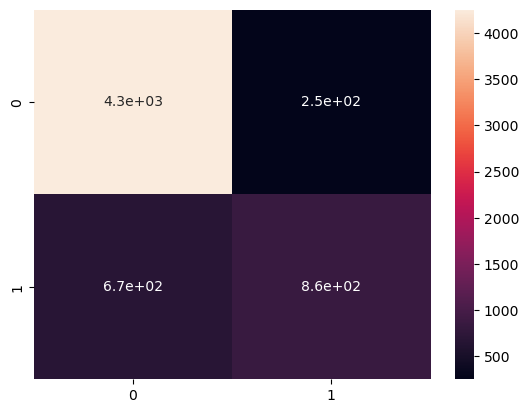

In [63]:
fit_test_svm(models,x_test,x_train,y_test,y_train)

In [66]:
from sklearn import metrics
def plot_roc_auc(models,x_test,x_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        fpr,tpr,_ =metrics.roc_curve(y_test,y_pred)
        auc=metrics.roc_auc_score(y_test,y_pred)
        plt.title('Roc and Auc for Model '+str(model))
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()  

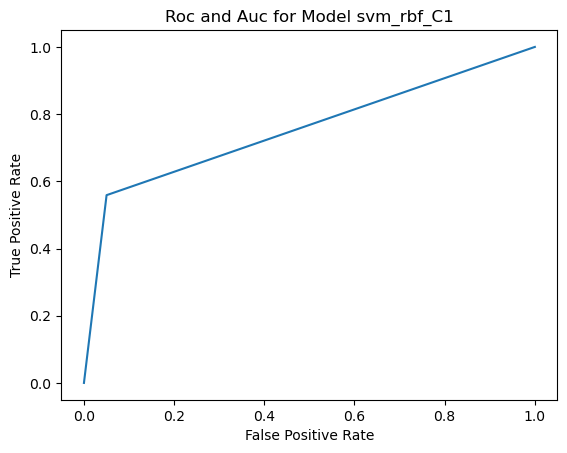

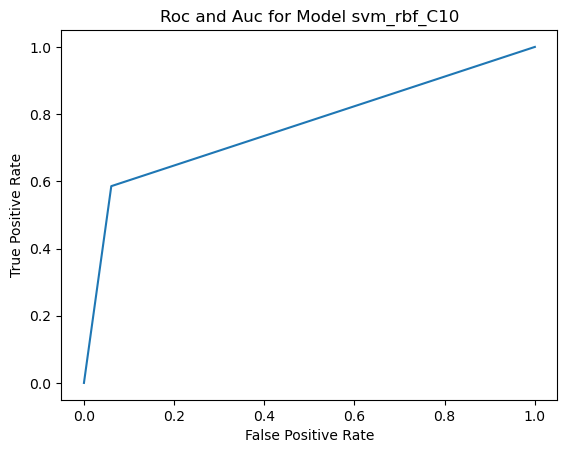

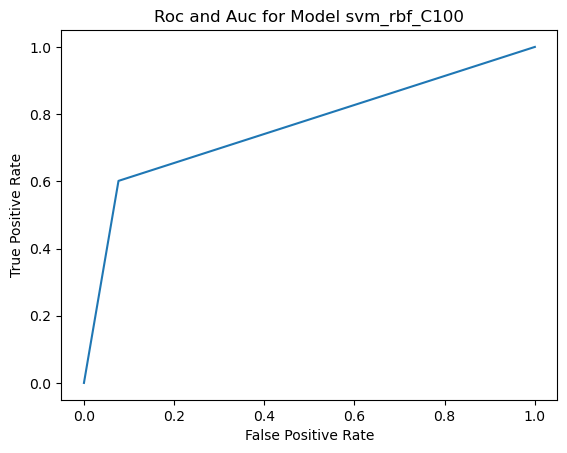

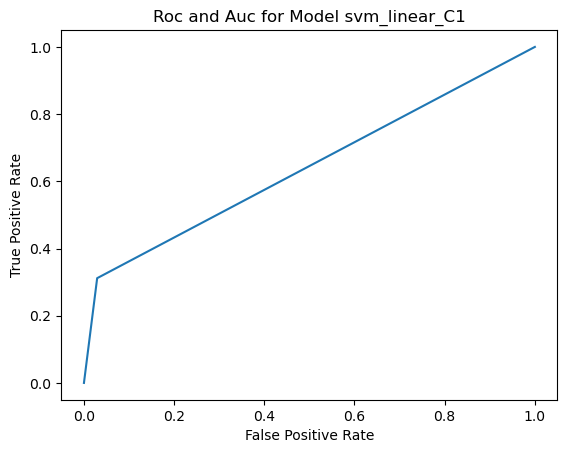

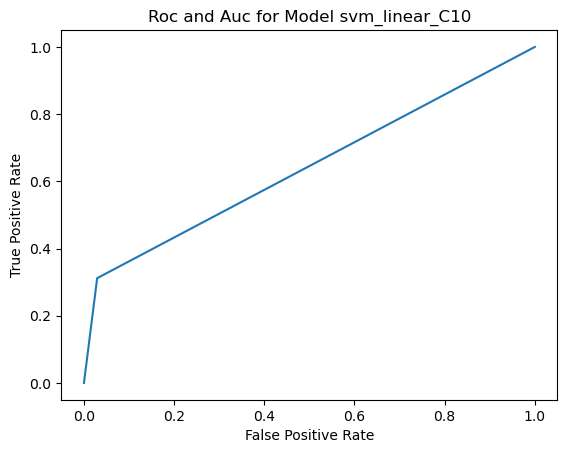

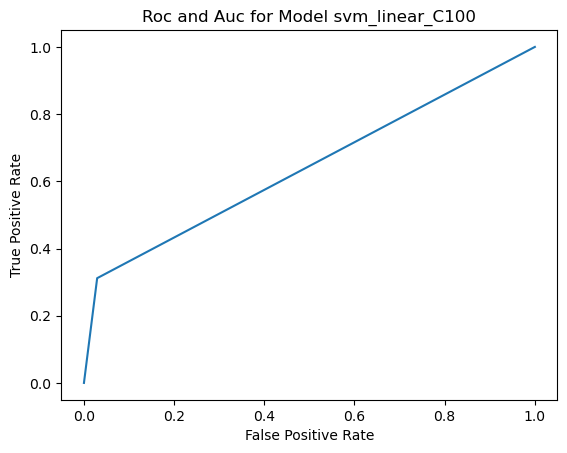

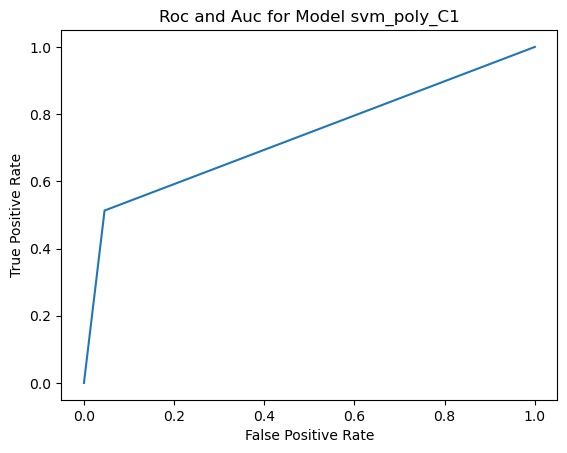

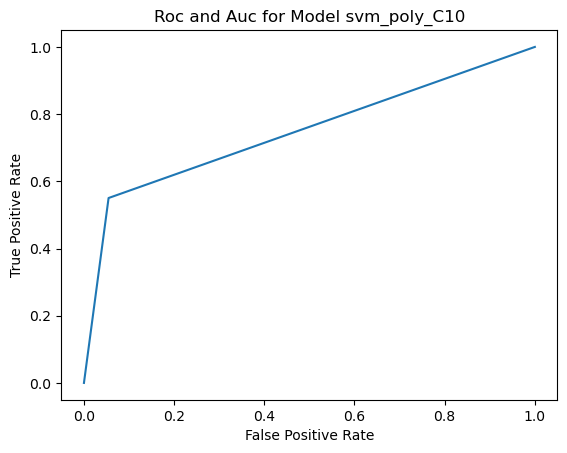

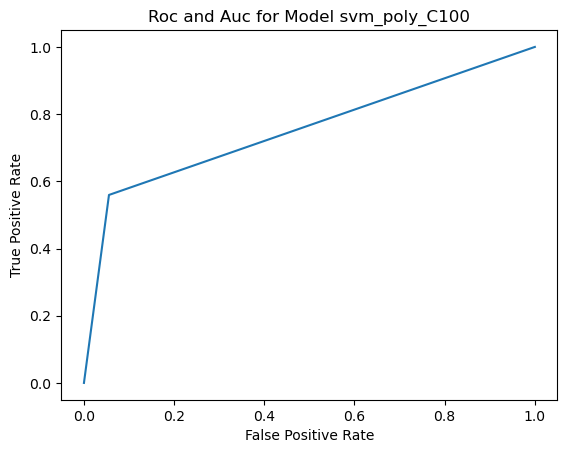

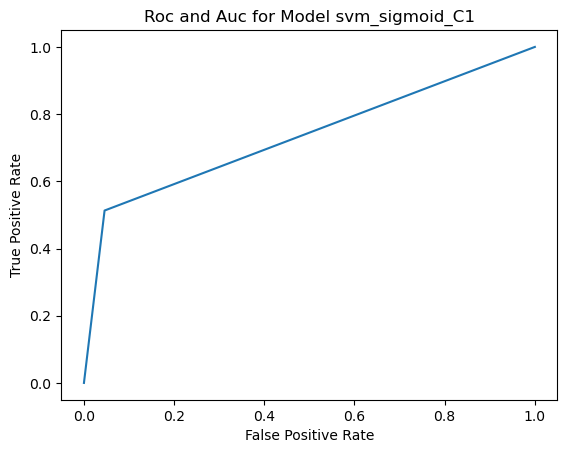

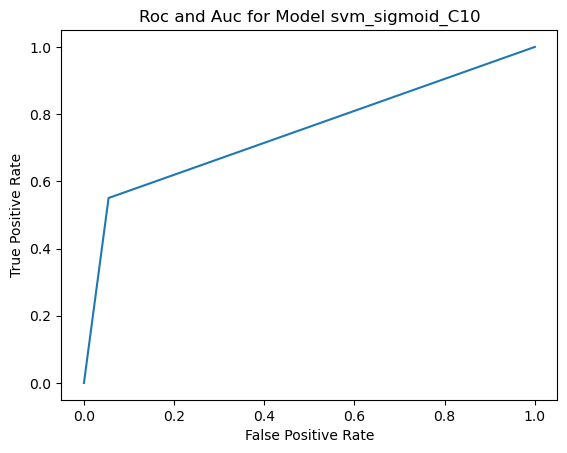

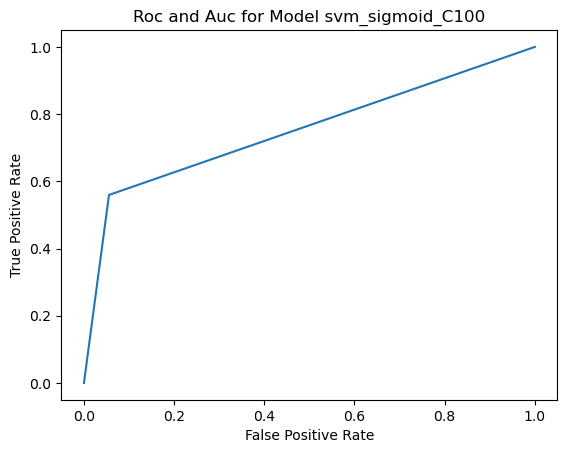

In [67]:
plot_roc_auc(models,x_test,x_train,y_test,y_train)

In [68]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC


linear_svm = SVC(kernel='linear')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
linear_cv_scores = cross_val_score(linear_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for Linear SVM:")
print(linear_cv_scores)


rbf_svm = SVC(kernel='rbf')
rbf_cv_scores = cross_val_score(rbf_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for RBF SVM:")
print(rbf_cv_scores)


poly_svm = SVC(kernel='poly', degree=2)
poly_cv_scores = cross_val_score(poly_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for Polynomial SVM:")
print(poly_cv_scores)


sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_cv_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv=skf)
print("\nCross-validation scores for Sigmoid SVM:")
print(sigmoid_cv_scores)



Cross-validation scores for Linear SVM:
[0.79941981 0.80978036 0.80915872 0.80563614 0.80062176]

Cross-validation scores for RBF SVM:
[0.8389971  0.84749275 0.84956486 0.84044758 0.84725389]

Cross-validation scores for Polynomial SVM:
[0.7973477  0.81123083 0.81164525 0.80915872 0.80124352]

Cross-validation scores for Sigmoid SVM:
[0.74471612 0.74678823 0.7424368  0.73912143 0.75129534]


In [ ]:
def stratified_shuffle_split(models, x, y):
    results = {}
    for model_name, model_instance in models.items():
        sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
        scores = []
        for train_index, test_index in sss.split(x, y):
            x_train, x_test = np.array(x)[train_index], np.array(x)[test_index]
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            try:
                model_instance.fit(x_train, y_train)
                pred = model_instance.predict(x_test)
                scores.append(accuracy_score(y_test, pred))
            except Exception as e:
                print(f"Error occurred with model {model_name}: {str(e)}")
                scores.append(None)
        results[model_name] = scores
        print('Shuffle split scores for model:', model_name)
        print(scores)
    return results

results=stratified_shuffle_split(models,x,y)

Shuffle split scores for model: svm_rbf_C1
[0.751132721847718, 0.751132721847718]
Shuffle split scores for model: svm_rbf_C10
[0.7605260249751353, 0.7537849486131064]
Shuffle split scores for model: svm_rbf_C100
[0.7862747264891148, 0.7914686705713339]
Shuffle split scores for model: svm_linear_C1
[0.8121339374516521, 0.813681069731462]
